In [40]:

import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Pair Programming Encoding

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:

    - Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.


In [2]:
df = pd.read_csv("../datos/supermarket_no_estandarizado.csv", index_col=0)


In [3]:
columnas_nuevas = {col: col.replace(' ', '_').replace('%', '') for col in df.columns}

In [4]:
df.rename(columns = columnas_nuevas, inplace = True)

In [5]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Payment,Rating,hora_compra,mes_compra,RATING_BOX,RATING_LOG
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,0.919607,Ewallet,9.1,Mañana,January,1.219986,1.157015
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Cash,9.6,Mañana,March,1.488445,1.364384
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Credit card,7.4,Mañana,March,0.277234,0.355296
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,0.675780,Ewallet,8.4,Noche,January,0.837737,0.846698
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,1.267125,Ewallet,5.3,Mañana,February,-0.968543,-0.938704


In [6]:
df.drop(["Invoice_ID", "Branch"], axis = 1, inplace = True)

In [7]:
df.head()

,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Payment,Rating,hora_compra,mes_compra,RATING_BOX,RATING_LOG
0,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,0.919607,Ewallet,9.1,Mañana,January,1.219986,1.157015
1,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Cash,9.6,Mañana,March,1.488445,1.364384
2,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Credit card,7.4,Mañana,March,0.277234,0.355296
3,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,0.675780,Ewallet,8.4,Noche,January,0.837737,0.846698
4,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,1.267125,Ewallet,5.3,Mañana,February,-0.968543,-0.938704


In [8]:
df.drop(["RATING_BOX", "Rating"], axis = 1, inplace = True)

In [9]:
df.head()

,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Payment,hora_compra,mes_compra,RATING_LOG
0,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,0.919607,Ewallet,Mañana,January,1.157015
1,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Cash,Mañana,March,1.364384
2,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Credit card,Mañana,March,0.355296
3,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,0.675780,Ewallet,Noche,January,0.846698
4,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,1.267125,Ewallet,Mañana,February,-0.938704


    - Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.


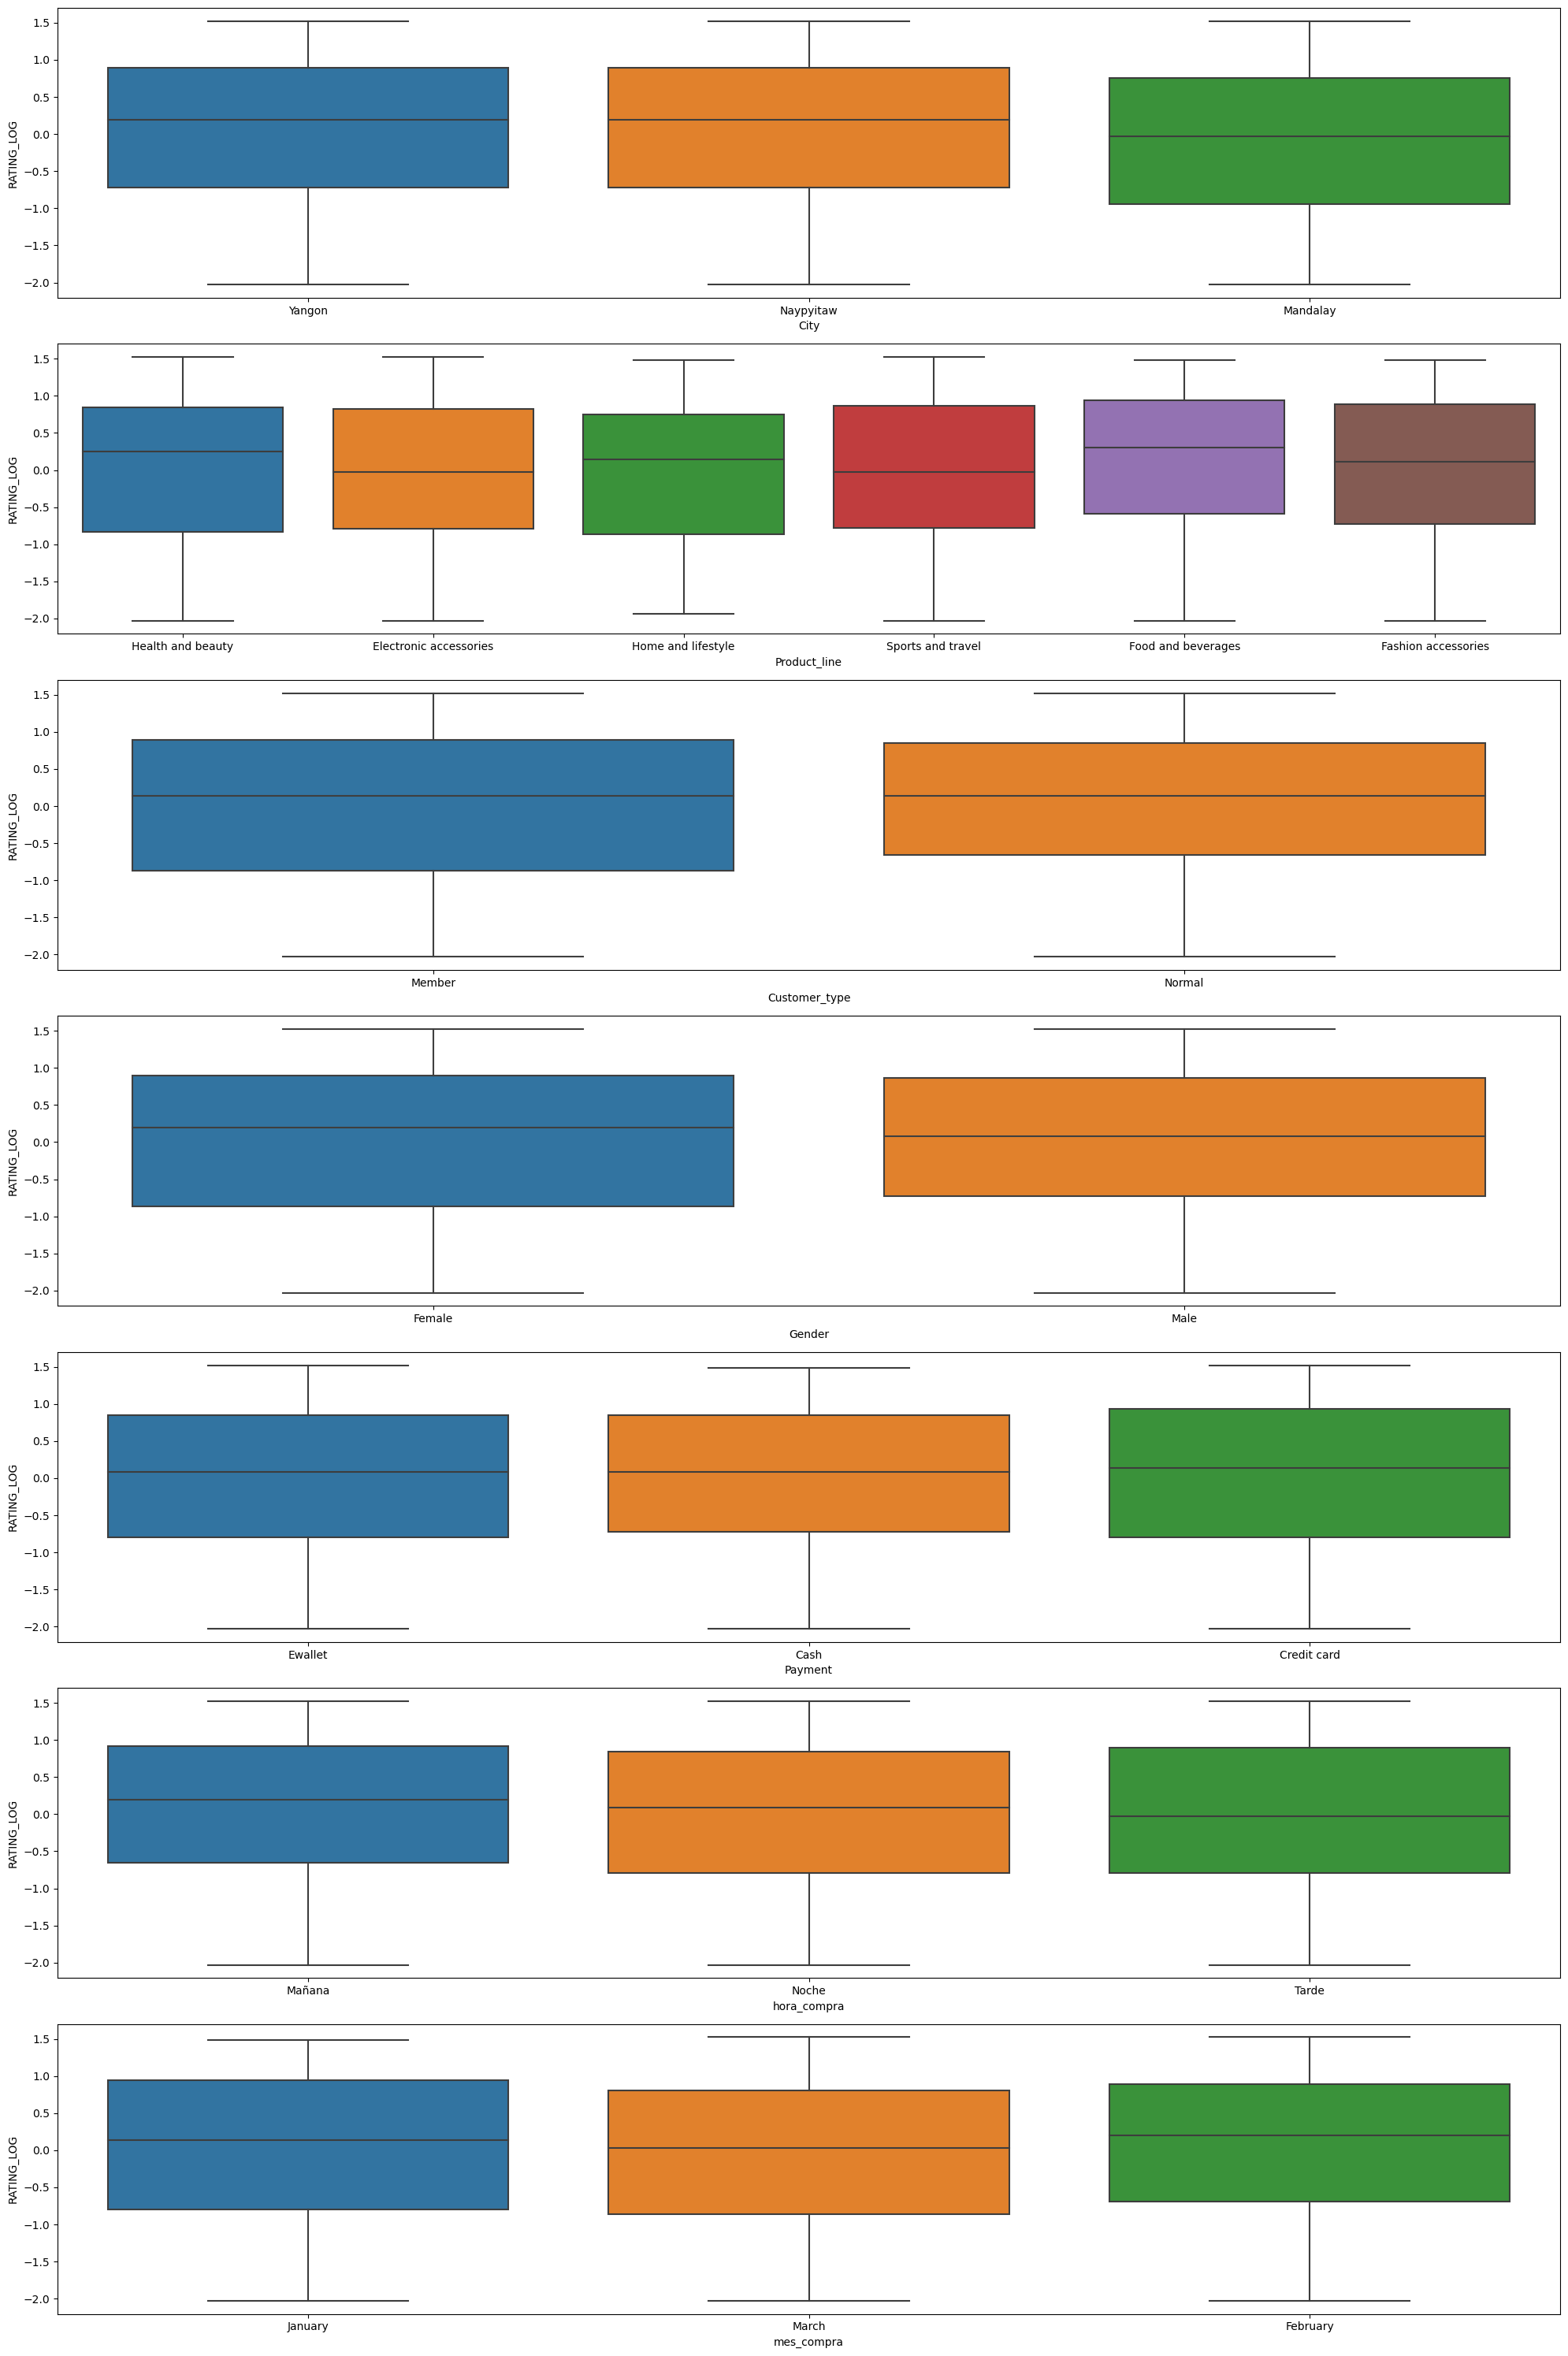

In [10]:
lista_categoricas = ["City", "Product_line", 'Customer_type', 'Gender', 'Payment', 'hora_compra', 'mes_compra']

fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["RATING_LOG"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();
    

Análisis visual del orden de las variables categóricas:
- Customer type - no tiene orden - Aplicamos OneHotEncoder
- Gender - no tiene orden. Es binaria
- Payment - no tiene orden
- hora_compra - decidimos asignar orden aunque la diferencia es pequeña y queremos reflejarlo en el peso que le demos. Mañana, Noche, Tarde.
- mes_compra - no tiene orden 
- city - consideramos que tienen un orden pero Mandalay sería 1 y las otras dos ciudades 2 (iguales)
- Product_type - vemos 3 agrupaciones en orden: 1ª food and beverages con Health / 2ª home con fashion / 3ªsports con electronics

In [11]:
oh = OneHotEncoder()

In [12]:
df["Customer_type"].unique()

array(['Member', 'Normal'], dtype=object)

In [13]:
transformados = oh.fit_transform(df[['Customer_type']])

In [14]:
oh_df = pd.DataFrame(transformados.toarray())

In [16]:
oh_df.columns = oh.get_feature_names_out()

In [17]:
oh_df.columns

Index(['Customer_type_Member', 'Customer_type_Normal'], dtype='object')

In [18]:
final = pd.concat([df,oh_df],axis=1)

In [19]:
final.head()

,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Payment,hora_compra,mes_compra,RATING_LOG,Customer_type_Member,Customer_type_Normal
0,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,0.919607,Ewallet,Mañana,January,1.157015,1.0,0.0
1,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Cash,Mañana,March,1.364384,0.0,1.0
2,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Credit card,Mañana,March,0.355296,0.0,1.0
3,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,0.675780,Ewallet,Noche,January,0.846698,1.0,0.0
4,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,1.267125,Ewallet,Mañana,February,-0.938704,0.0,1.0


In [22]:
def one_hot_encoder_one(df,columna,keep_first=True):
    
    # iniciamos el método de OneHot Encoder
    oh = OneHotEncoder()
    
    # hacemos la codificación de los datos para la variable dada 
    transformados = oh.fit_transform(df[columna])
    
    # convertimos nuestro array con la codificación hecha en un dataframe
    oh_df = pd.DataFrame(transformados.toarray())
    
    # el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
    oh_df.columns = oh.get_feature_names_out()
    
    # concatenamos el dataframe original con el dataframe que acabamos de crear
    final = pd.concat([df,oh_df],axis=1)
    
    # eliminamos la columna original 
    final.drop(columna, axis = 1,  inplace = True)
    return final

In [23]:
df_encode = one_hot_encoder_one(df, ["Gender"])

In [24]:
df_encode2 = one_hot_encoder_one(df_encode, ["Payment"])

In [25]:
df_encode3 = one_hot_encoder_one(df_encode2, ["mes_compra"])

In [26]:
df_encode4 = one_hot_encoder_one(df_encode3, ["Customer_type"])

In [27]:
df_encode4.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,hora_compra,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal
0,Yangon,Health and beauty,0.718160,0.509930,0.919607,0.919607,Mañana,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,Naypyitaw,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Mañana,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Yangon,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Mañana,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Yangon,Health and beauty,0.096214,0.852165,0.675780,0.675780,Noche,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,Yangon,Sports and travel,1.156959,0.509930,1.267125,1.267125,Mañana,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Para City aplicamos .map

In [28]:
df.groupby("City").median()

,Unit_price,Quantity,Tax_5,Total,RATING_LOG
City,,,,,
Mandalay,-0.031046,-0.174540,-0.285173,-0.285173,-0.029959
Naypyitaw,0.042969,0.167695,-0.209743,-0.209743,0.194851
Yangon,-0.092032,-0.174540,-0.334220,-0.334220,0.194851


In [29]:
df["RATING_LOG"].median()

0.1398583481776395

In [30]:
#tasa de cambio seria la mediana del rating_log respecto a cada ciudad - la mediana de la otra ciudad / mediana rating

In [31]:
(0.194851 - 0.1398583481776395) / 0.1398583481776395

0.3932024976622217

In [32]:
(-0.029959-0.1398583481776395)/0.1398583481776395

-1.2142095941384057

In [33]:
df.groupby("City")["RATING_LOG"].count().mean()

333.3333333333333

In [34]:
mapa = {"Mandalay": 1, "Yangon": 2, "Naypyitaw": 2}

In [35]:
df_encode4["City"] = df_encode4["City"].map(mapa) 

In [36]:
df_encode4.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,hora_compra,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal
0,2,Health and beauty,0.718160,0.509930,0.919607,0.919607,Mañana,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Mañana,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Mañana,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,Health and beauty,0.096214,0.852165,0.675780,0.675780,Noche,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2,Sports and travel,1.156959,0.509930,1.267125,1.267125,Mañana,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Para las dos columnas que nos faltan vamos a hacer un OrdinalEncoder

- city - consideramos que tienen un orden pero Mandalay sería 1 y las otras dos ciudades 2 (iguales)
- Product_type - vemos 3 agrupaciones en orden: 1ª food and beverages con Health / 2ª home con fashion / 3ªsports con electronics

In [37]:
orden_horas = ["Tarde", "Noche", "Mañana"]



In [51]:
def ordinal_encoder1(df, columna, orden_valores):
    
    # iniciamos el método y aplicamos la transformación a los datos. 
    ordinal = OrdinalEncoder(categories = [orden_valores], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])
    
    # lo convertimos a dataframe
    oe_df = pd.DataFrame(transformados_oe)
    # cambiamos el nombre de la columna
    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    # sobre escribimos la columna con los valores de la tranformación
    df[columna] = oe_df
     
    return df

In [52]:
df_ordinal = ordinal_encoder1(df_encode4, "hora_compra", orden_horas)

In [53]:
df_ordinal.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,hora_compra,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,Health and beauty,0.718160,0.509930,0.919607,0.919607,Mañana,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Mañana,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Mañana,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,Health and beauty,0.096214,0.852165,0.675780,0.675780,Noche,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,Sports and travel,1.156959,0.509930,1.267125,1.267125,Mañana,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [54]:
df.groupby("Product_line").median()

,Unit_price,Quantity,Tax_5,Total,RATING_LOG,hora_compra_oe
Product_line,,,,,,
Electronic accessories,-0.157361,0.167695,-0.332639,-0.332639,-0.029959,1.0
Fashion accessories,-0.021983,-0.174540,-0.452951,-0.452951,0.111967,1.0
Food and beverages,-0.063332,-0.174540,-0.286775,-0.286775,0.302549,1.0
Health and beauty,0.065437,0.167695,-0.206133,-0.206133,0.249074,1.0
Home and lifestyle,-0.003101,0.167695,-0.263576,-0.263576,0.139858,1.0
Sports and travel,0.112451,0.167695,-0.211730,-0.211730,-0.029959,1.0


In [55]:
mapa2 = {"Sports and travel": 1, "Electronic accessories": 1,
          "Fashion accessories": 1.8, "Home and lifestyle": 2,
          "Health and beauty":3.5 , "Food and beverages": 4.3}

In [56]:
df_ordinal["Product_line"] = df_ordinal["Product_line"].map(mapa2)

In [59]:
df_ordinal.drop(['hora_compra'], axis = 1, inplace= True)

In [60]:
df_ordinal.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.718160,0.509930,0.919607,0.919607,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-1.525303,-0.174540,-0.987730,-0.987730,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.352781,0.509930,0.071446,0.071446,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.096214,0.852165,0.675780,0.675780,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.156959,0.509930,1.267125,1.267125,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


    - Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [61]:
df_ordinal.to_csv('../datos/df_regresion.csv')